### Analysis software development 

Goal: establish smooth reading of the binary DAQ datafiles

In [1]:
import sys
sys.path.insert(0,'python/')
import struct
import matplotlib.pyplot as plt
import numpy as np
# import data handling class
from DT5550 import DT5550

Filename to process

In [2]:
#filename = '../daq/ReadoutClient/co60_tmode0_100k.raw'
filename = '../daq/ReadoutClient/real_data_10k.raw'

Open a datafile and read the data

In [3]:
#
# open the datfile
#
print('Open datafile:',filename)
io = DT5550(file=filename)
#
# loop over the data
#
Q0 = []
Q1 = []
dt = []
while(io.read_event() == 0):
    if io.n_event%10000 == 0:
        print('Processed ',io.n_event,' events')
    # here you can decide what to do with the event information
    # ......
    if io.valid[0] and io.valid[1]:
        dt.append(io.t[0]-io.t[1])
        Q0.append(io.Q[0])
        Q1.append(io.Q[1])
    
print('Processing done')

Open datafile: ../daq/ReadoutClient/real_data_10k.raw
Processed  10000  events
Processing done


Text(0, 0.5, '$Q_1$')

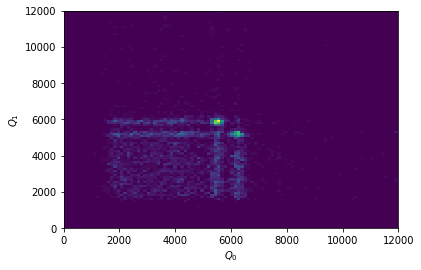

In [4]:
import matplotlib as mpl

h = plt.hist2d(Q0,Q1,bins=(100,100),range=((0,12000),(0,12000)))#,norm=mpl.colors.LogNorm())
plt.xlabel('$Q_0$')
plt.ylabel('$Q_1$')

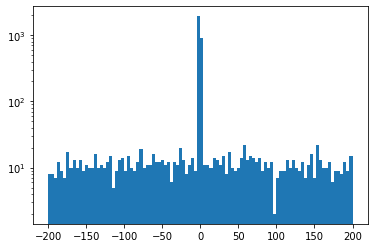

In [5]:
h = plt.hist(dt,bins=100,range=(-200,200))
plt.yscale('log')

A few basic plots: integrated charge and time

python\DT5550.py:130: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


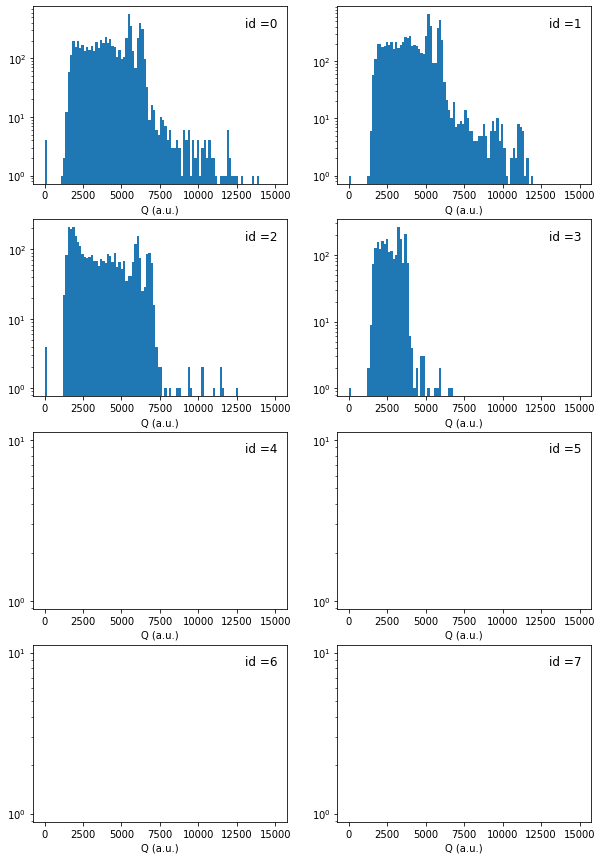

In [6]:
io.plot_all(type="charge",range=(0,15000),logy=True)

python\DT5550.py:110: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


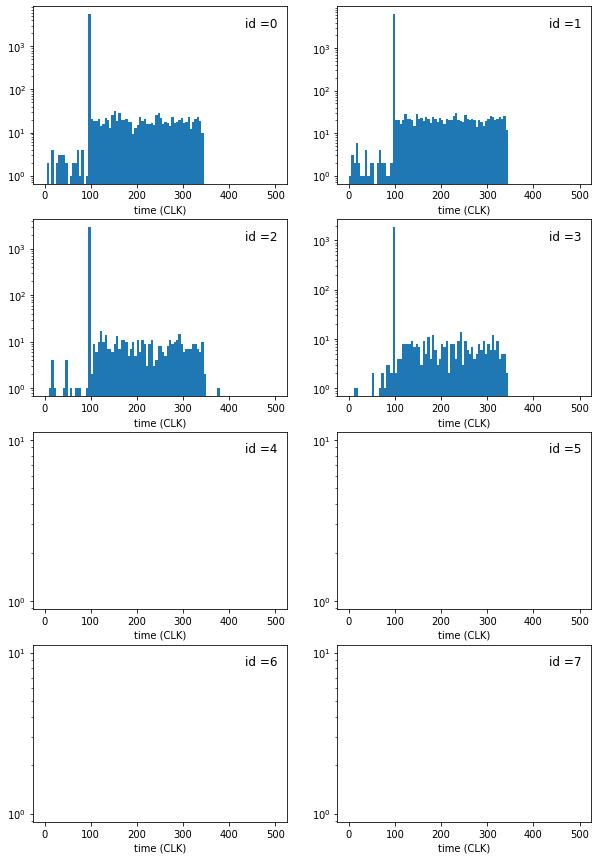

In [7]:
io.plot_all(type="time",range=(0,500),logy=True)